# Cubic Spline Interpolator

Written by Jason JeongSoo Doo - February 19th, 2017

The purpose of this project was to make a cubic spline interpolator using a set of data points that is provided by the user. I used Python 3, numpy library, and my knowledge from a linear algebra course to write some code that sets up a system of equations, solves it, and plots it. 

It works for any number of data points - try it out :)

P.S This was my first time trying Python 3, Jupyter Notebook, and LaTeX (although it's not my first time programming) so any feedback is appreciated.

## Background

A well known method of interpolation is Lagrange interpolation. You fit an order n-1 polynomial through n points. A problem with this is that as n becomes large, there are huge oscillations in the interpolation which is undesirable. To overcome this, we can use a cubic spline. A cubic spline is curve through a set of given data points. Between each data point is a piecewise cubic function - so you restrict the polynomial to order 3 and reduce the interpolation error. 

Given n points, we have n-1 intervals, so we need n-1 cubic functions. Each cubic function has four unknowns (a,b,c,d) since:
$$F_i(x) = a_{i} ( x - x_{i} ) ^3 + b_{i} ( x - x_{i} ) ^{2} +  c_{i} ( x -x _{i}) + d_{i}$$

So in total we have 4(n-1) unknowns. We can set up a matrix to solve for these unknowns and make a plot using matlabplot. There are five conditions the piecewise polynomials have to satisfy.

(1) $F_i(x_i) = y_i$ where i = 1, 2, ..., n-1

(2) $F_i(x_{i+1}) = y_{i+1}$ where i = 1, 2, ..., n-1

(3) $F_i^{\prime}(x_{i+1}) = F_{i+1}^{\prime}(x_{i+1})$ where i = 1, ..., n-2, since the first derivative must be continuous.

(4) $F_i^{\prime\prime}(x_{i+1}) = F_{i+1}^{\prime\prime}(x_{i+1})$ where i = 1, ..., n-2, since the second derivative must be also continuous.

(5) Natural conditions: $F^{\prime\prime}(x_{1}) = F^{\prime\prime}(x_{n})$

These conditions provide us with the equations to solve for the unknowns.

(i) Plug in $(x_i, y_i)$ into $F(x)$. We get the trivial answers: $d_i = y_i$. We can eliminate these from our unknowns. So $4(n-1) - (n-1) = 3n-3$ unknowns to solve for (i.e. $a_i, b_i, c_i, d_i$)

(ii) $F_i(x_{i+1}) = a_{i} (x_{i+1} - x_{i} ) ^3 + b_{i} (x_{i+1} - x_{i} ) ^{2} +  c_{i} ( x_{i+1} -x _{i}) + d_{i}$ must also be true. So:
$$\tag{1} y_{i+1} = a_{i} (x_{i+1} - x_{i} ) ^3 + b_{i} (x_{i+1} - x_{i} ) ^{2} +  c_{i} ( x_{i+1} -x _{i}) + d_{i} $$

Substitute $d_{i} = y_{i}$ from (i):
$$ y_{i+1} - y_{i} = a_{i} (x_{i+1} - x_{i} ) ^3 + b_{i} (x_{i+1} - x_{i} ) ^{2} +  c_{i} ( x_{i+1} -x _{i}) $$

(iii) $$F_i^{\prime}(x_{i+1}) = F_{i+1}^{\prime}(x_{i+1})$$<br> 
$$\tag{2}  3a_{i}(x_{i+1}-x_{i})^2 + 2b_i(x_{i+1}-x_{i})+c_i = c_{i+1} $$

(iv) $$F_i^{\prime\prime}(x_{i+1}) = F_{i+1}^{\prime\prime}(x_{i+1})$$ <br>
$$\tag{3}  6a_{i}(x_{i+1}-x_{i}) + 2b_i = 2b_{i+1} $$

(v) Using the natural conditions at the end points:
$$\tag{4}  2b_{1} = 0, 6a_{n-1}(x_{n}-x_{n-1}) + 2b_{n-1}=0 $$

The above 4 equations form a basis for the matrix for solving $a_i, b_i, c_i$.


# Try it

To use my cubic spline interpolator, enter the set of data points in the cell below (edit the x and y array). 

For example, if you have the set of points (0,1), (2,5), (3,-2), you would enter:
```python
x = [0,2,3]
y = [1,5,-2]
```

Make sure that x and y are the same dimensions, and that x-coordinates are given in increasing order (unless you want to see some interesting shapes). 
Also, ensure that you have at least two points - it doesn't make sense to try to interpolate 0 or 1 point...

Finally, click on Cell -> Run All, and scroll all the way down to see the plots of the interpolation.

In [1]:
# ENTER INPUT HERE
x = [1, 2, 5]    
y = [4, -2, 10]

## Matrix Setup

Below is the code that sets up matrix A and column vector b, where Ax=b, and x is the solution or the coefficients of the piecewise cubic polynomials. It goes through the conditions/equations above, and creates the matrix needed to solve for the unknowns. Note that the matrix A is non-singular and is sparse - this means that Ax=b can be solved efficiently. The matrix is also well-conditioned (low condition number) unlike a Vandermonde matrix where the condition number can be very large.

In [2]:
import numpy as np
import math 

n = 3*(len(x)-1) # number of unknowns (a_i, b_i, c_i)
# Ax = b, initialize matrices to zeros for now
A = np.zeros((n,n))
b = np.zeros(n)

# condition 1
d_i = y

# condition 2
for i in range(len(x)-1):
    dx = x[i+1]-x[i]
    dy = y[i+1]-y[i]
    b[i*3] = dy
    # dy = a_i(dx)^3 + b_i(dx)^2 +  c_i(dx)
    a_i = math.pow(dx,3)
    b_i = math.pow(dx,2)
    c_i = math.pow(dx,1)
    A[[i*3],[i*3,i*3+1,i*3+2]]=[a_i,b_i,c_i]

# condition 3
# 3a_i(dx)^2 + 2b_i(dx) + c_i - c_i+1 = 0
for i in range(len(x)-2):
    dx = x[i+1]-x[i]
    row = [i*3 + 1]
    cols = [i*3,i*3+1,i*3+2,i*3+3,i*3+4,i*3+5]
    A[row,cols] = [3*math.pow(dx,2), 2*dx,1,0,0,-1]
    
# condition 4
# 6a_i(dx) + 2b_i - 2_b_i+1 = 0
for i in range(len(x)-2):
    dx = x[i+1]-x[i]
    row = [i*3 + 2]
    cols = [i*3, i*3+1,i*3+2,i*3+3,i*3+4]
    A[row,cols] = [6*dx,2,0,0,-2]
    
# condition 5
# 2b_1 = 0, 6a_n-1*(dx) + 2b_n-1 = 0
A[[3*(len(x)-2)+1],[1]] = 2
A[[3*(len(x)-2)+2],[3*(len(x)-2)]] = 6*(x[-1]-x[-2])
A[[3*(len(x)-2)+2],[3*(len(x)-2)+1]] = 2

# Plotting

Now that the hard part is done, we just have to plot the piecewise cubic functions after solving the system of equations Ax=b. 

The code below extracts the values of $a_i, b_i, c_i, d_i$ using a for-loop, and uses matplotlib.pyplot to create a plot. The variables width/height can be changed to make the plot bigger. 

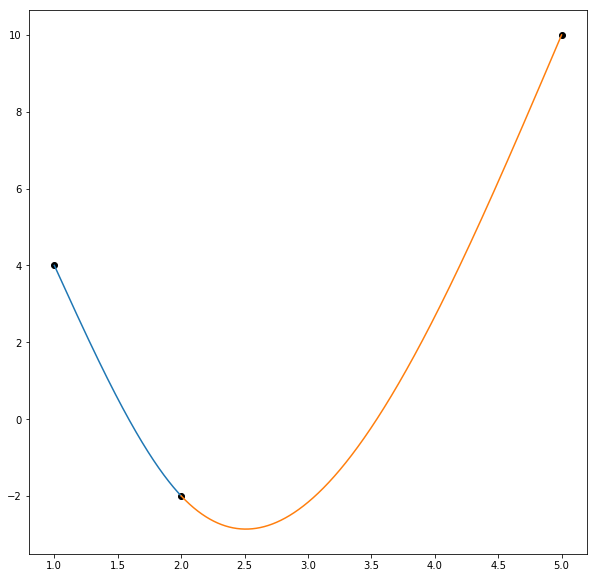

In [3]:
import matplotlib.pyplot as plt
from numpy import linalg as LA 

p = LA.solve(A,b)

width = 10
height = 10
N = 10000 # number of points in an interval, higher N means better smoothness

plt.figure(figsize=(width, height))
plt.plot(x,y,'ko') # plot data points
for i in range(len(x)-1):
    smooth_x = np.linspace(x[i],x[i+1],N) # x-values
    a_i = p[i*3]
    b_i = p[i*3+1]
    c_i = p[i*3+2]
    d_i = y[i]
    smooth_y = a_i*(smooth_x - x[i])**3 + b_i*(smooth_x-x[i])**2 + c_i*(smooth_x-x[i])+ d_i # y-values
    plt.plot(smooth_x,smooth_y)

plt.show()